<!--  -->

# COVID Multi-State Model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =10 ,6
import numpy as np
import seaborn as sns
import datetime
from matplotlib.pyplot import figure
import os
from pathlib import Path
import shutil
import missingno as msno

In [2]:
import pan

SyntaxError: invalid syntax (<ipython-input-2-e9a8e8c50c82>, line 1)

In [2]:
qa_path = '../data/QA Checks/'
graphics_path = '../Graphics/'
data_path = '../data/'
code_path = os.getcwd()

In [3]:
# clears out the graphics folder. Moves everthing to archive
os.chdir(graphics_path)
files = os.listdir()
for file in files:
#     print(file)
    full_dest = os.path.join('Archive/',file)
    if os.path.isfile(file):
        shutil.move(file, full_dest)
os.chdir(code_path)

In [4]:
today = datetime.date.today()
mon = today.month
day = today.day
year = today.year
date_today = f'{mon}-{day}-{year}'

In [5]:
df = pd.read_excel(f'{data_path}COVID Multi-state Model Data set (7-14-20).xlsx', sep=',', sheet_name = 'Project_Dataset')
df.columns = df.columns.str.lower()
df.date = pd.to_datetime(df.date)
df['week'] = df.date.dt.weekofyear

In [12]:
df.date.max()

Timestamp('2020-08-29 00:00:00')

In [6]:
df.columns

Index(['awaiting_testing', 'negative', 'positive', 'percent_positive',
       'total_tested', 'file_name', 'county', 'inconclusive', 'day_of_week',
       'new_negatives', 'new_cases', 'date', 's0101_c01_032e',
       's1501_c02_002e', 's1501_c02_009e', 's1901_c01_012e', 'dp05_0001e',
       'dp05_0037pe', 'dp05_0038pe', 'dp05_0039pe', 'dp05_0044pe',
       'dp05_0052pe', 'fips', 'length_of_life_rank', 'quality_of_life_rank',
       'health_behaviors_rank', 'clinical_care_rank',
       'social_economic_factors_rank', 'physical_environment_rank',
       'adult_smoking_percent', 'adult_obesity_percent', 'uninsured_percent',
       'primary_care_physicians_ratio', 'income_inequality_ratio',
       'air_pollution_particulate_matter', 'overcrowding',
       'adult_diabetes_percent', 'median_household_income',
       'percent_over_65_yrs', 'black_percent', 'hispanic_percent',
       'female_percent', 'rural_percent', 'week'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13185 entries, 0 to 13184
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   awaiting_testing                  13185 non-null  int64         
 1   negative                          13185 non-null  int64         
 2   positive                          13185 non-null  int64         
 3   percent_positive                  13185 non-null  int64         
 4   total_tested                      13185 non-null  int64         
 5   file_name                         13185 non-null  object        
 6   county                            13185 non-null  object        
 7   inconclusive                      13185 non-null  int64         
 8   day_of_week                       13185 non-null  int64         
 9   new_negatives                     13116 non-null  float64       
 10  new_cases                         13116 non-nu

## Descriptive Stats

In [7]:
# number of unique Counties in the data set 
df['county'].nunique()

69

In [13]:
df.new_cases.describe().to_frame(name='Descriptive Analysis of County-level Daily New COVID-19 Cases Counts')

,Descriptive Analysis of County-level Daily New COVID-19 Cases Counts
count,13116.000000
mean,46.633272
std,193.496147
min,-822.000000
25%,0.000000
50%,4.000000
75%,23.000000
max,5461.000000


In [14]:
df.percent_positive.describe().to_frame(name='Descriptive Analysis of County-level Daily Percent of Positive COVID-19 Tests')

,Descriptive Analysis of County-level Daily Percent of Positive COVID-19 Tests
count,13185.000000
mean,7.869170
std,5.540953
min,0.000000
25%,4.000000
50%,7.000000
75%,11.000000
max,100.000000


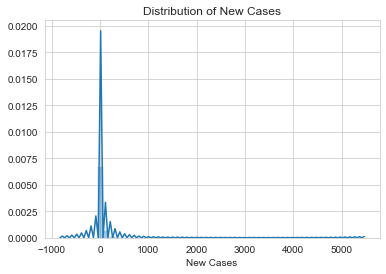

In [15]:
sns.set_style('whitegrid')
sns.distplot(df['new_cases'])
plt.title('Distribution of New Cases')
plt.rcParams['figure.figsize'] = (20,6) # changes plot size
plt.xlabel('New Cases')
plt.savefig(f'{graphics_path}Distribution of New Cases({date_today}).png')

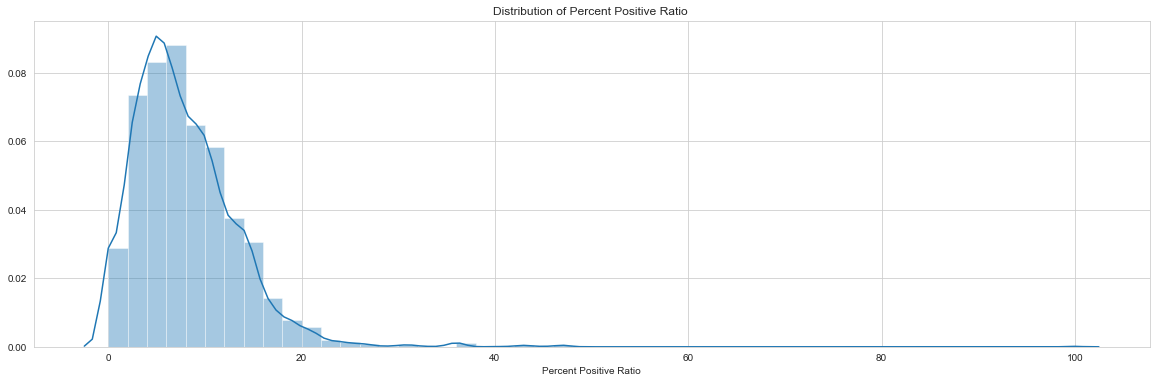

In [16]:
sns.distplot(df['percent_positive'])
plt.title('Distribution of Percent Positive Ratio ')
plt.rcParams['figure.figsize'] = (20,6) # changes plot size
plt.xlabel('Percent Positive Ratio')
plt.savefig(f'{graphics_path}Distribution of Positivity Ratio({date_today}).png')

### Calculating Overall Summary Statistics

In [17]:
mean_county = df.groupby('county')[['total_tested', 'new_cases', 's0101_c01_032e', 'percent_positive',
        'length_of_life_rank', 'quality_of_life_rank','health_behaviors_rank', 'clinical_care_rank', 
        'social_economic_factors_rank', 'physical_environment_rank',
        'adult_smoking_percent', 'adult_obesity_percent', 'uninsured_percent',
        'primary_care_physicians_ratio', 'income_inequality_ratio',
        'air_pollution_particulate_matter', 'overcrowding',
        'adult_diabetes_percent', 'median_household_income',
        'percent_over_65_yrs', 'black_percent', 'hispanic_percent',
        'female_percent', 'rural_percent','s1501_c02_009e' ,'s1901_c01_012e' ]
          ].agg(['mean', 'median', 'min', 'max'])
mean_county.sort_values(by =('new_cases','mean'), ascending=False).head(5)
# mean.columns

total_tested                           new_cases                \
                       mean    median   min     max        mean median    min   
county                                                                          
MIAMI-DADE    247911.283505  156056.0  1074  803039  801.580311  271.0    8.0   
BROWARD       154787.577320   91060.0  1430  496355  363.067358  118.0  -27.0   
PALM BEACH    101721.479381   61819.0   315  319133  214.134715  110.0    0.0   
HILLSBOROUGH   87387.721649   47834.0   677  274864  189.590674   42.0    0.0   
ORANGE         98018.618557   62119.0   436  306052  182.248705   33.0 -126.0   

                     s0101_c01_032e         ... rural_percent            \
                 max           mean median  ...           min       max   
county                                      ...                           
MIAMI-DADE    5461.0           40.1   40.1  ...      0.404377  0.404377   
BROWARD       2597.0           40.4   40.4  ...      0.016933  0.016933   
PALM BEACH    1251.0           44.9   44.9  ...      1.042546  1.042546   
HILLSBOROUGH  1112.0           37.1   37.1  ...      3.512861  3.512861   
ORANGE        1390.0           35.3   35.3  ...      2.042138  2.042138   

             s1501_c02_009e                    s1901_c01_012e           \
                       mean median   min   max           mean   median   
county                                                                   
MIAMI-DADE             26.9   26.9  26.9  26.9        48982.0  48982.0   
BROWARD                27.2   27.2  27.2  27.2        57333.0  57333.0   
PALM BEACH             24.4   24.4  24.4  24.4        59943.0  59943.0   
HILLSBOROUGH           27.8   27.8  27.8  27.8        56137.0  56137.0   
ORANGE                 24.5   24.5  24.5  24.5        54335.0  54335.0   

                                
                  min      max  
county                          
MIAMI-DADE    48982.0  48982.0  
BROWARD       57333.0  57333.0  
PALM BEACH    59943.0  59943.0  
HILLSBOROUGH  56137.0  56137.0  
ORANGE        54335.0  54335.0  

[5 rows x 100 columns]

Counties with highest single day values for new case counts

In [18]:
mean_county.sort_values(by =('new_cases','max'), ascending=False).head(5)

total_tested                           new_cases                \
                     mean    median   min     max        mean median    min   
county                                                                        
MIAMI-DADE  247911.283505  156056.0  1074  803039  801.580311  271.0    8.0   
BROWARD     154787.577320   91060.0  1430  496355  363.067358  118.0  -27.0   
ORANGE       98018.618557   62119.0   436  306052  182.248705   33.0 -126.0   
LEE          41340.108247   23669.0   125  127833   94.663212   35.0 -157.0   
PALM BEACH  101721.479381   61819.0   315  319133  214.134715  110.0    0.0   

                   s0101_c01_032e         ... rural_percent            \
               max           mean median  ...           min       max   
county                                    ...                           
MIAMI-DADE  5461.0           40.1   40.1  ...      0.404377  0.404377   
BROWARD     2597.0           40.4   40.4  ...      0.016933  0.016933   
ORANGE      1390.0           35.3   35.3  ...      2.042138  2.042138   
LEE         1275.0           48.8   48.8  ...      5.820245  5.820245   
PALM BEACH  1251.0           44.9   44.9  ...      1.042546  1.042546   

           s1501_c02_009e                    s1901_c01_012e                    \
                     mean median   min   max           mean   median      min   
county                                                                          
MIAMI-DADE           26.9   26.9  26.9  26.9        48982.0  48982.0  48982.0   
BROWARD              27.2   27.2  27.2  27.2        57333.0  57333.0  57333.0   
ORANGE               24.5   24.5  24.5  24.5        54335.0  54335.0  54335.0   
LEE                  30.9   30.9  30.9  30.9        54691.0  54691.0  54691.0   
PALM BEACH           24.4   24.4  24.4  24.4        59943.0  59943.0  59943.0   

                     
                max  
county               
MIAMI-DADE  48982.0  
BROWARD     57333.0  
ORANGE      54335.0  
LEE         54691.0  
PALM BEACH  59943.0  

[5 rows x 100 columns]

Creating a data set that contains summary statistics for the entire study period by county

In [20]:
overall = pd.DataFrame()
overall['new_case_median'] = mean_county[('new_cases','median')]
overall['new_case_mean'] = mean_county[('new_cases','mean')]
overall['percent_positive_median'] = mean_county[('percent_positive','median')]
overall['air_pollution_particulate_matter'] = mean_county[('air_pollution_particulate_matter', 'mean')]
overall['social_economic_factors_rank'] = mean_county[( 'social_economic_factors_rank','mean')]
overall['rural_percent'] = mean_county[('rural_percent','mean')]
overall['length_of_life_rank'] = mean_county[('length_of_life_rank','mean')]
overall['overcrowding'] = mean_county[ ('overcrowding', 'mean')]
overall['clinical_care_rank'] = mean_county[('clinical_care_rank', 'mean')]
overall['uninsured_percent'] = mean_county[('uninsured_percent',   'mean')]
overall['social_economic_factors_rank'] = mean_county[('social_economic_factors_rank',   'mean')]
overall['adult_obesity_percent'] = mean_county[('adult_obesity_percent',   'mean')]
overall['health_behaviors_rank'] = mean_county[('health_behaviors_rank',   'mean')]
overall['length_of_life_rank'] = mean_county[('length_of_life_rank',   'mean')]
overall['quality_of_life_rank'] = mean_county[( 'quality_of_life_rank',   'mean')]
overall['percent_adult_wdiplo'] = mean_county[( 's1501_c02_009e',   'mean')]
overall['median_income'] = mean_county[('median_household_income',   'mean')]
overall['income_inequality_ratio'] = mean_county[('income_inequality_ratio',   'mean')]
overall.reset_index()

demo = pd.DataFrame()
demo['new_case_median'] = mean_county[('new_cases','median')]
demo['new_case_mean'] = mean_county[('new_cases','mean')]
demo['percent_positive_median'] = mean_county[('percent_positive','median')]
demo['black_percent'] = mean_county[('black_percent','mean')]
demo['median_age'] = mean_county[('s0101_c01_032e','mean')]
demo['female_percent'] = mean_county[ ('female_percent',   'mean')]
demo['percent_over_65_yrs'] = mean_county[( 'percent_over_65_yrs',   'mean')]

# overall['length_of_life_rank'] = mean_county[('length_of_life_rank',   'mean')]
demo.reset_index()



,county,new_case_median,new_case_mean,percent_positive_median,black_percent,median_age,female_percent,percent_over_65_yrs
0,ALACHUA,6.0,26.357513,4.0,19.959549,31.7,51.685460,14.015617
1,BAKER,0.0,5.948187,6.0,13.814142,NaN,47.391994,14.159760
2,BAY,2.0,27.243523,6.0,11.214494,39.6,50.385618,17.096720
3,BRADFORD,1.0,3.715026,5.0,19.692053,NaN,44.764171,17.795327
4,BREVARD,8.0,37.077720,5.0,9.961984,47.2,51.092655,23.681869
...,...,...,...,...,...,...,...,...
64,UNKNOWN,1.0,1.290155,8.0,NaN,NaN,NaN,NaN
65,VOLUSIA,12.0,47.409326,7.0,10.366221,46.6,51.196629,24.424424
66,WAKULLA,0.0,4.549223,5.0,12.803056,NaN,46.622100,15.668032
67,WALTON,2.0,7.720207,9.0,5.039580,44.4,49.450088,20.563222


In [21]:
overall.columns

Index(['new_case_median', 'new_case_mean', 'percent_positive_median',
       'air_pollution_particulate_matter', 'social_economic_factors_rank',
       'rural_percent', 'length_of_life_rank', 'overcrowding',
       'clinical_care_rank', 'uninsured_percent', 'adult_obesity_percent',
       'health_behaviors_rank', 'quality_of_life_rank', 'percent_adult_wdiplo',
       'median_income', 'income_inequality_ratio'],
      dtype='object')

#### Correlation Analysis (Heat map)

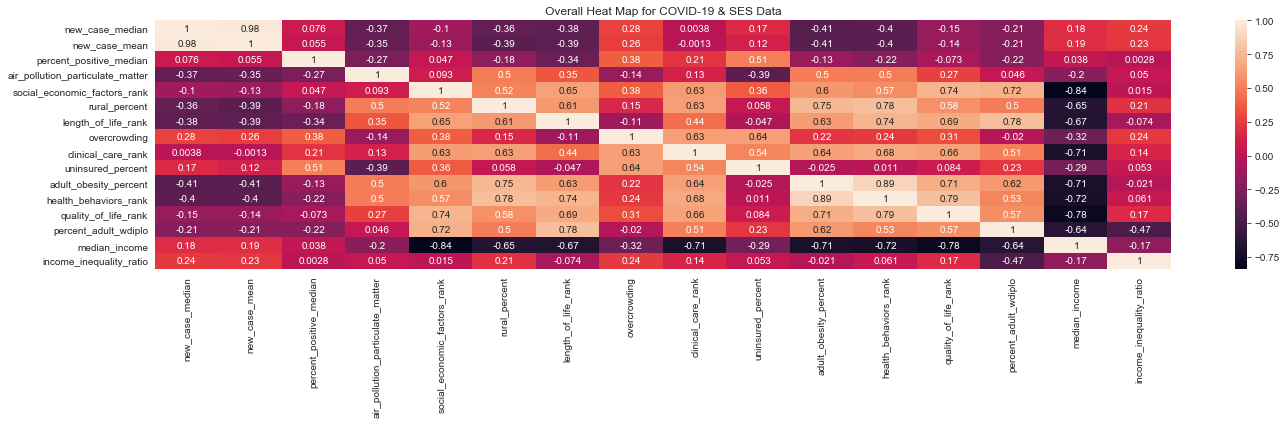

In [22]:
corr = overall.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.title('Overall Heat Map for COVID-19 & SES Data')
plt.tight_layout()
plt.savefig(f'{graphics_path}Overall Heat Map SES Vars ({date_today}).png')


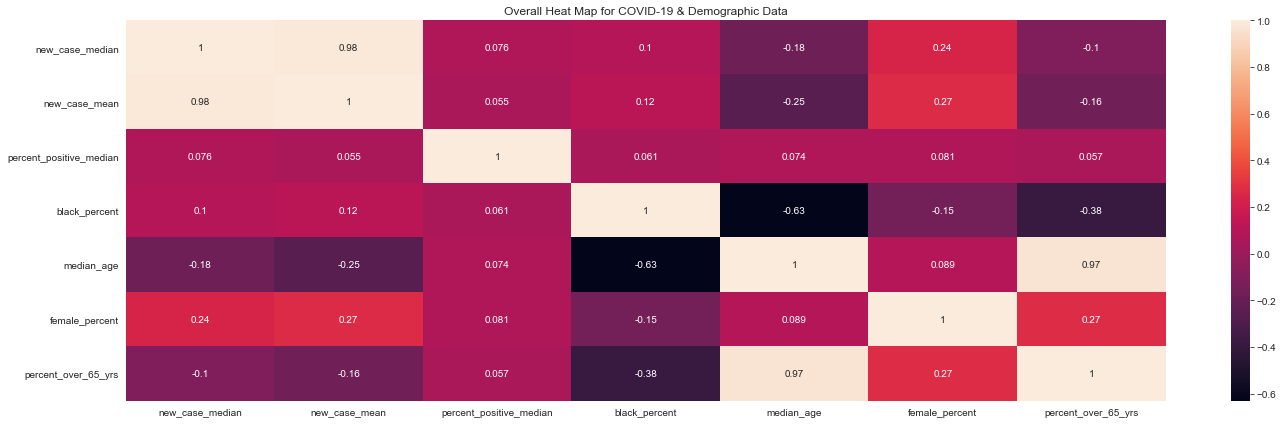

In [20]:
corr2 = demo.corr()
sns.heatmap(corr2, xticklabels=corr2.columns, yticklabels=corr2.columns, annot=True)
plt.title('Overall Heat Map for COVID-19 & Demographic Data')
plt.tight_layout()
plt.savefig(f'{graphics_path}Overall Heat Map Demo Vars ({date_today}).png')


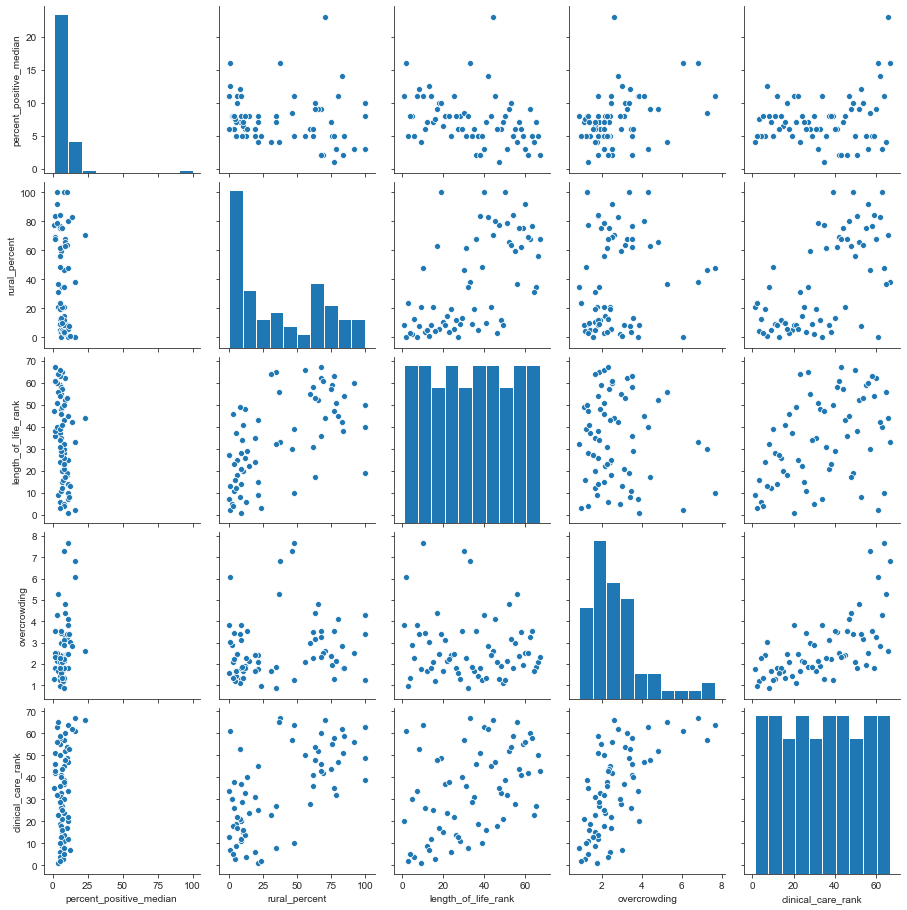

In [23]:
sns.set_style('ticks')
sns.pairplot(overall, vars= ['percent_positive_median','rural_percent','length_of_life_rank', 'overcrowding','clinical_care_rank'])

In [63]:
# sns.set_style('ticks')
# sns.pairplot(overall)
# plt.savefig(f'{graphics_path}Scatter Plot Matrix ({date_today}).png')

New Cases & Median Age Scatter Plot

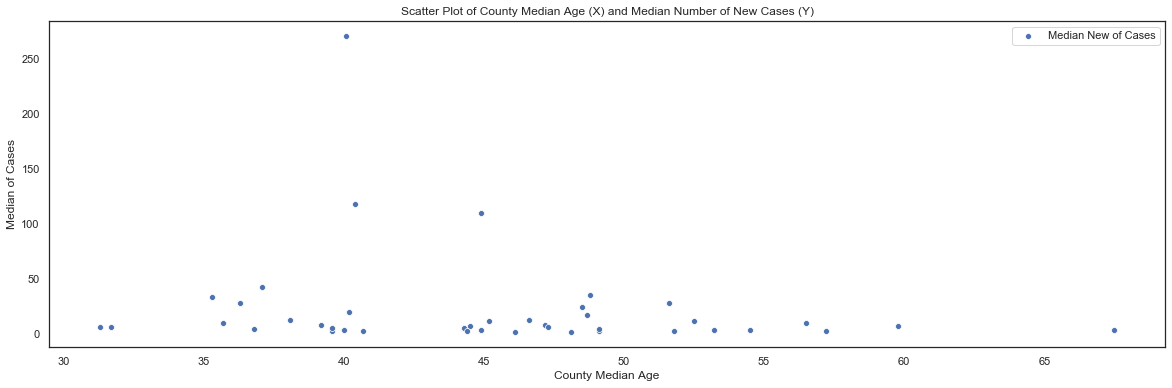

In [24]:
sns.set(style='white')
sns.scatterplot(x='median_age',  y= 'new_case_median', data= demo, label = 'Median New of Cases')
plt.title('Scatter Plot of County Median Age (X) and Median Number of New Cases (Y)')
plt.rcParams['figure.figsize'] = (10,10) # changes plot size
# plt.tight_layout()
plt.ylabel('Median of Cases')
plt.xlabel('County Median Age')
plt.savefig(f'{graphics_path}Scatter Plot Median of New Cases by Median Age ({date_today}).png')

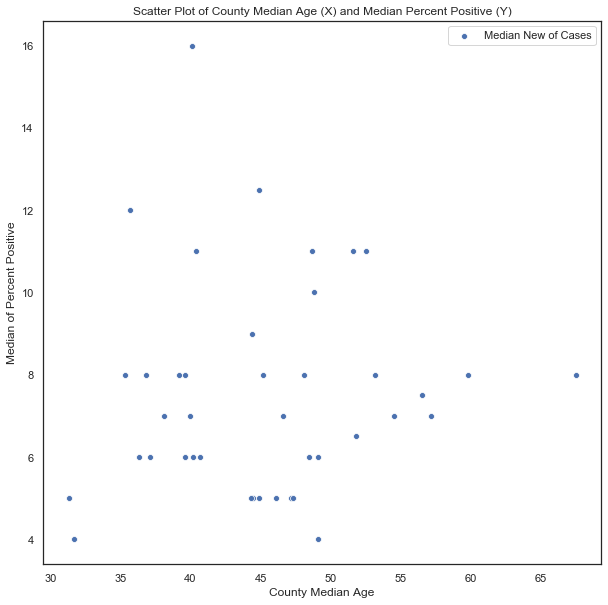

In [25]:
sns.set(style='white')
sns.scatterplot(x='median_age',  y= 'percent_positive_median', data= demo, label = 'Median New of Cases')
plt.title('Scatter Plot of County Median Age (X) and Median Percent Positive (Y)')
plt.rcParams['figure.figsize'] = (10,10) # changes plot size
# plt.tight_layout()
plt.ylabel('Median of Percent Positive')
plt.xlabel('County Median Age')
plt.savefig(f'{graphics_path}Scatter Plot Median of New Cases by Median PP ({date_today}).png')

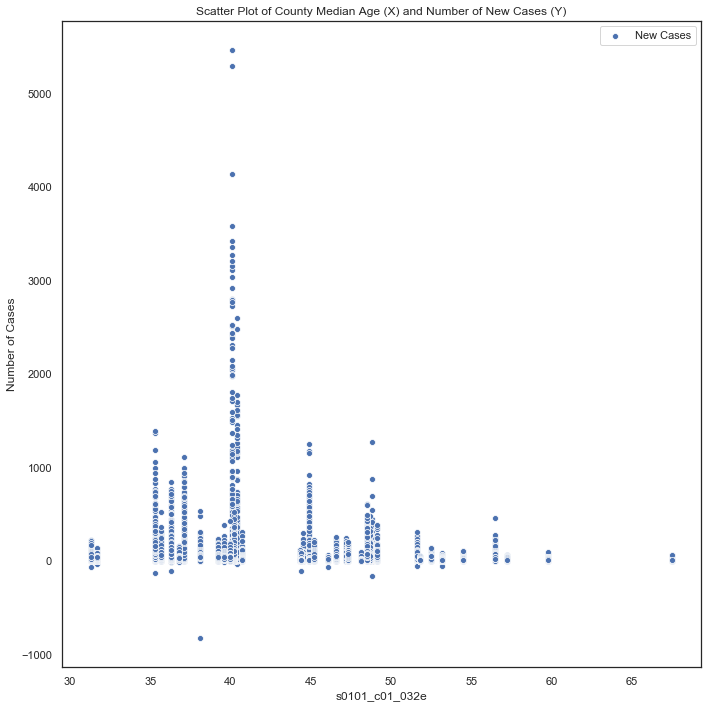

In [26]:
sns.scatterplot(x='s0101_c01_032e',  y= 'new_cases', data= df, label = 'New Cases')
plt.title('Scatter Plot of County Median Age (X) and Number of New Cases (Y)')
plt.rcParams['figure.figsize'] = (20,6) # changes plot size
plt.tight_layout()
plt.ylabel('Number of Cases')
plt.savefig(f'{graphics_path}Scatter Plot Number of New Cases by Median Age ({date_today}).png')

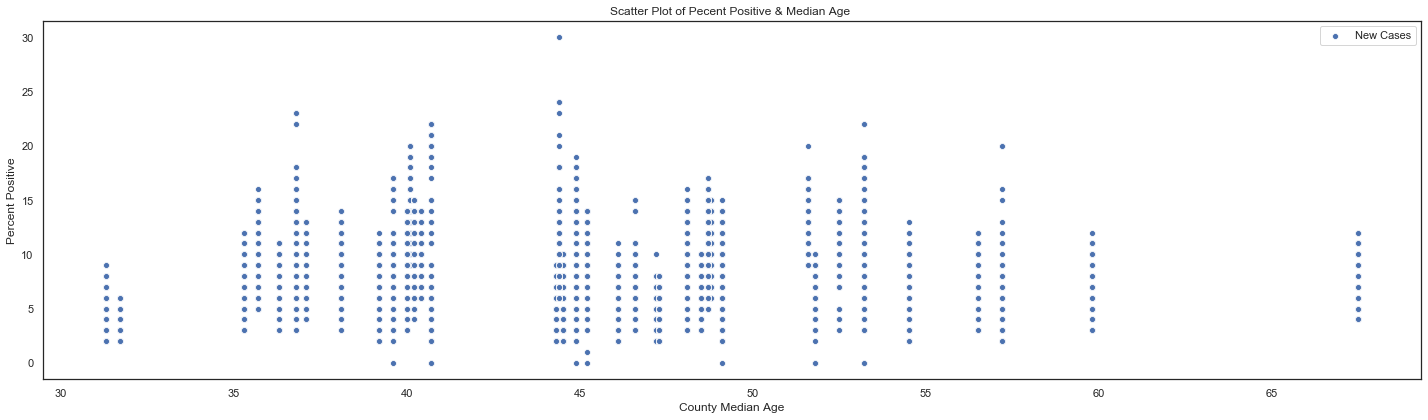

In [27]:
sns.set(style='white')
sns.scatterplot(x='s0101_c01_032e',  y= 'percent_positive', data= df, label = 'New Cases')
plt.title('Scatter Plot of Pecent Positive & Median Age ')
plt.rcParams['figure.figsize'] = (20,6) # changes plot size
plt.tight_layout()
plt.ylabel('Percent Positive')
plt.xlabel('County Median Age')
plt.savefig(f'{graphics_path}Scatter Plot Pecent Positive & Median Age ({date_today}).png')

### Weekly Case Count Graphing

Calculating the weekly summary statistics

In [29]:
df.week.max()

35

In [30]:
week_case = pd.DataFrame(df.groupby('week').new_cases.agg(['median', 'mean', 'var']))
week_case['week'] = week_case.index
print(week_case.columns)

Index(['median', 'mean', 'var', 'week'], dtype='object')


In [31]:
week_case.head()

,median,mean,var,week
week,,,,
12,0.0,2.242424,42.316567,12
13,0.0,4.168076,292.457435,13
14,1.0,8.371041,964.394449,14
15,1.0,7.925420,884.317250,15
16,1.0,6.742647,607.036749,16


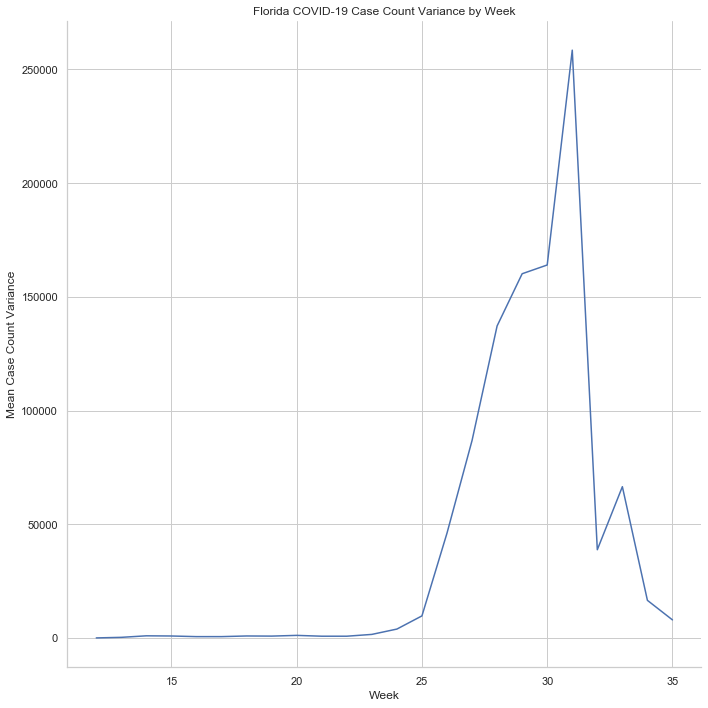

In [32]:
sns.set(style='whitegrid')
sns.relplot(x='week',  y= 'var',kind= 'line', estimator = None, height=10, aspect=1, data= week_case )
plt.title('Florida COVID-19 Case Count Variance by Week')
plt.tight_layout() 
plt.ylabel('Mean Case Count Variance')
plt.xlabel('Week')
plt.savefig(f'{graphics_path}Weekly Case Count Variance ({date_today}).png')

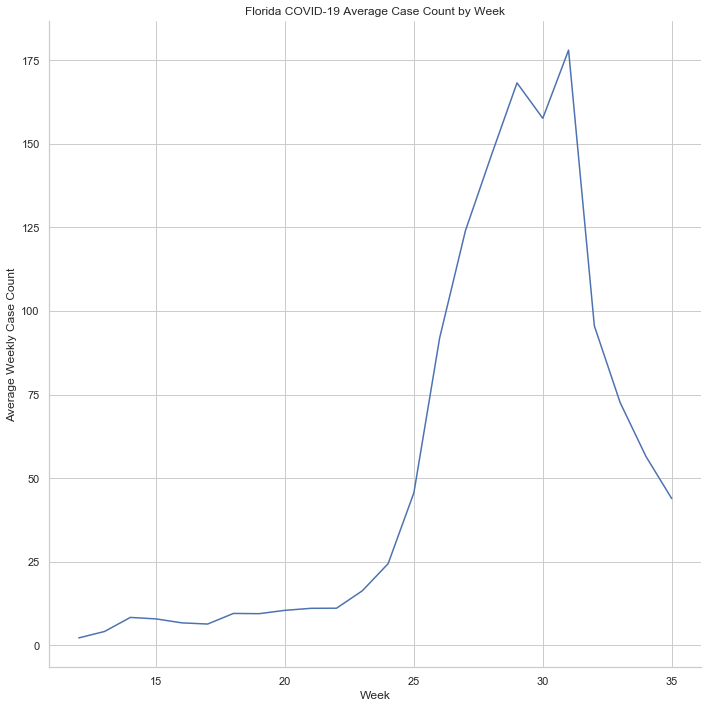

In [33]:
sns.relplot(x='week',  y= 'mean',kind= 'line', estimator =None, height=10, aspect=1, data= week_case )
plt.title('Florida COVID-19 Average Case Count by Week')
plt.tight_layout()
plt.ylabel('Average Weekly Case Count')
plt.xlabel('Week')
plt.savefig(f'{graphics_path}Mean Weekly Case Count ({date_today}).png')

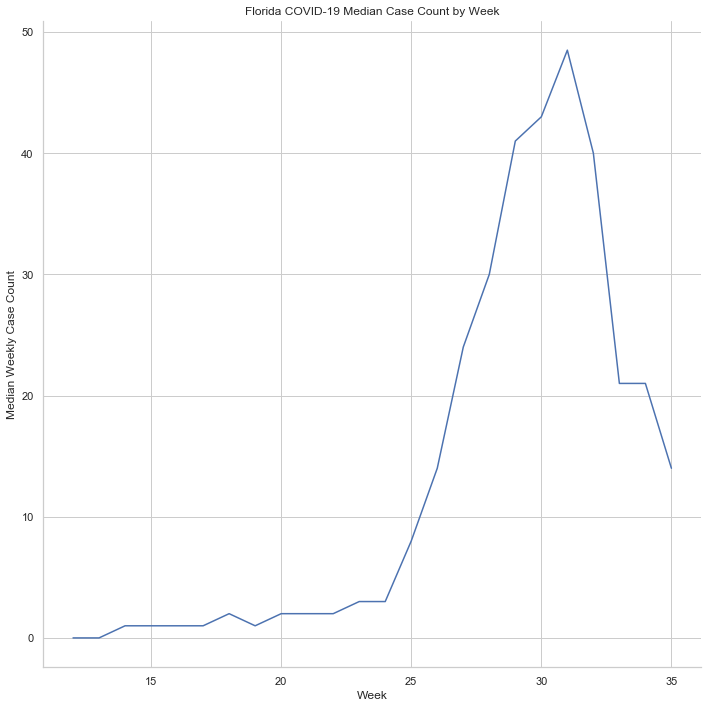

In [34]:
sns.relplot(x='week',  y= 'median',kind= 'line', estimator =None, height=10, aspect=1, data= week_case )
plt.title('Florida COVID-19 Median Case Count by Week')
plt.tight_layout()
plt.ylabel('Median Weekly Case Count')
plt.xlabel('Week')
plt.savefig(f'{graphics_path}Median Weekly Case Count ({date_today}).png')

### Weekly Percent Positive Ratio Graphing

Calculating the weekly summary statistics

In [35]:
# Calculating the Weekly median Percent Positive Ratio
week_per = pd.DataFrame(df.groupby('week').percent_positive.agg(['median', 'var']))
week_per['week'] = week_per.index
print(week_per.columns)

Index(['median', 'var', 'week'], dtype='object')


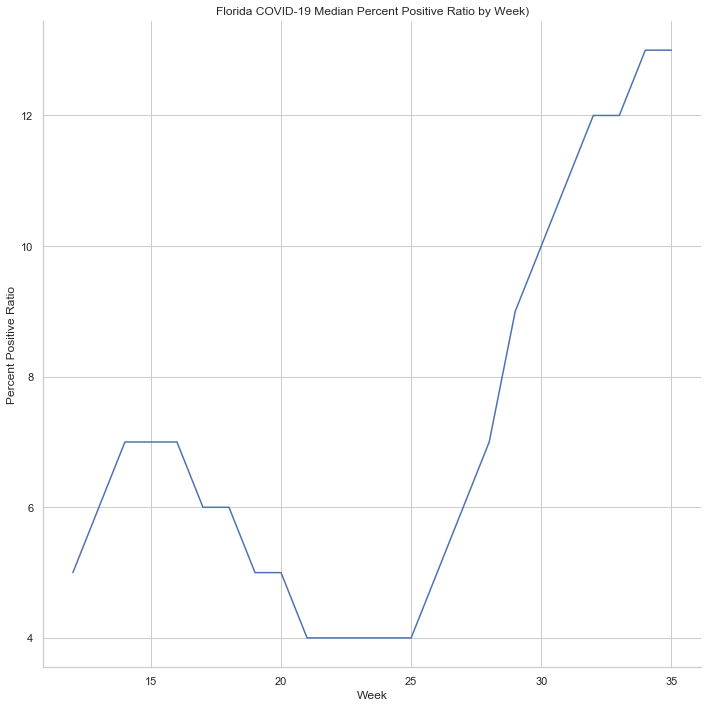

In [36]:
sns.set(style='whitegrid')
sns.relplot(x='week',  y= 'median' ,kind= 'line', estimator=None , height=10, aspect=1, data= week_per )
plt.title('Florida COVID-19 Median Percent Positive Ratio by Week)')
plt.tight_layout()
plt.ylabel('Percent Positive Ratio')
plt.xlabel('Week')
plt.savefig(f'{graphics_path}Median Weekly Percent Positive Ratio ({date_today}).png')

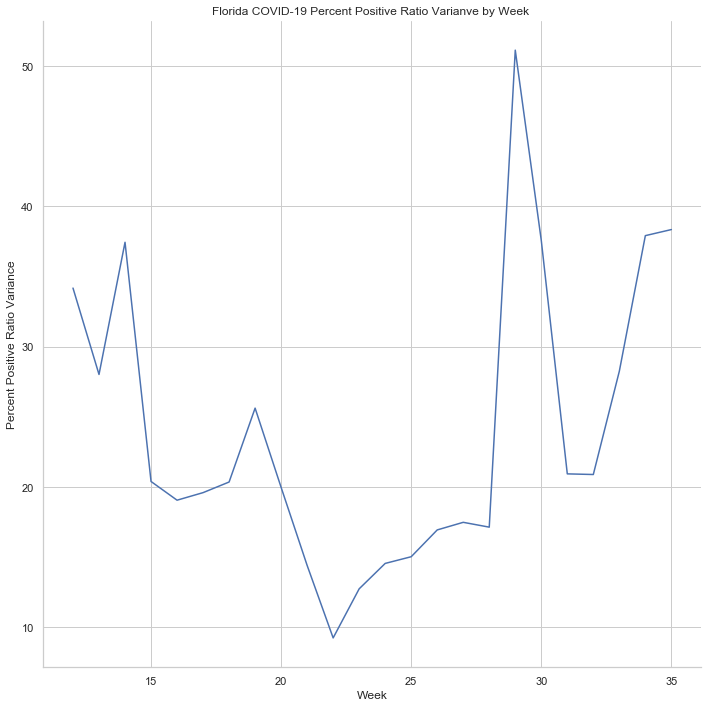

In [37]:
sns.set(style='whitegrid')
sns.relplot(x='week',  y= 'var',kind= 'line', estimator = 'mean', height=10, aspect=1, data= week_per )
plt.title('Florida COVID-19 Percent Positive Ratio Varianve by Week ')
plt.tight_layout()
plt.ylabel('Percent Positive Ratio Variance')
plt.xlabel('Week')
plt.savefig(f'{graphics_path}Median Weekly Percent Positive Ratio Variance ({date_today}).png')

Text(0.5, 0, 'County Population')

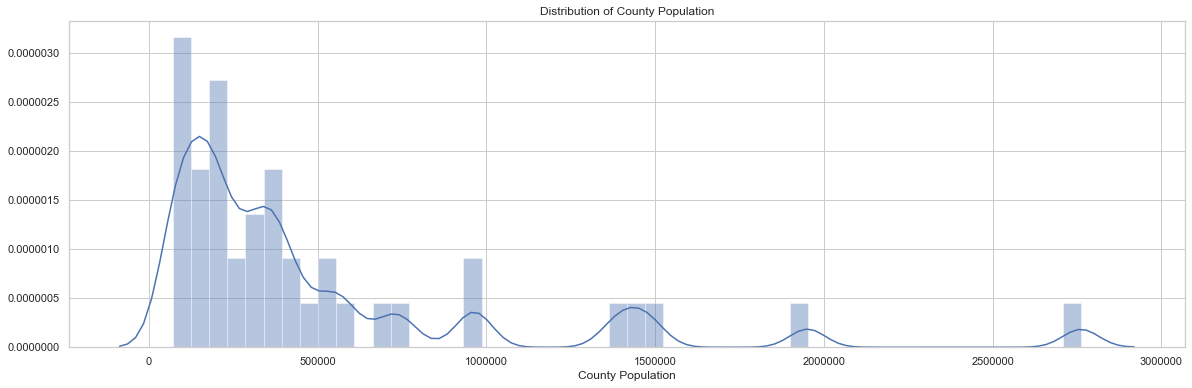

In [77]:
sns.distplot(df['dp05_0001e'])
plt.title('Distribution of County Population')
plt.xlabel('County Population')

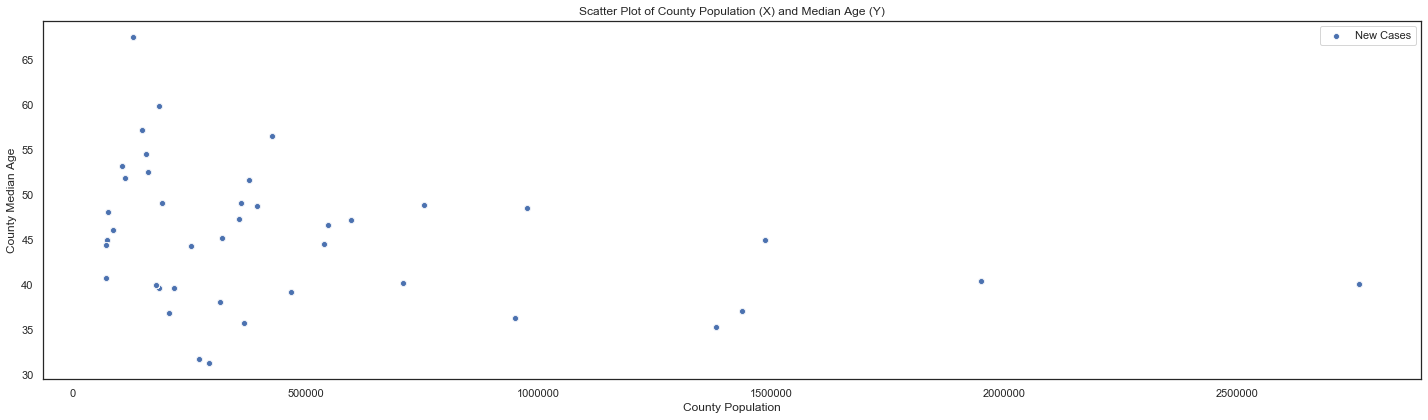

In [78]:
sns.set(style='white')
sns.scatterplot(x='dp05_0001e',  y= 's0101_c01_032e', data= df, label = 'New Cases')
plt.title('Scatter Plot of County Population (X) and Median Age (Y)')
plt.tight_layout()
plt.ylabel('County Median Age')
plt.xlabel('County Population')
plt.savefig(f'{graphics_path}Scatter Plot County Population & Median Age({date_today}).png')

# Time Series Analysis

In [14]:
df_indexed = df.set_index('date')

In [42]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df_indexed.percent_positive,autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'n'])
for key,value in dftest[4].items():
    dfoutput[f'Critical Value ({key})']= value
print(dfoutput)

Test Statistic         -1.400499e+01
p-value                 3.802300e-26
#Lags Used              6.000000e+00
n                       1.317800e+04
Critical Value (1%)    -3.430846e+00
Critical Value (5%)    -2.861759e+00
Critical Value (10%)   -2.566887e+00
dtype: float64


In [37]:
# plt.xlabel('Date')
# plt.ylabel('Positivity Ratio')
# plt.plot(df_indexed.percent_positive)

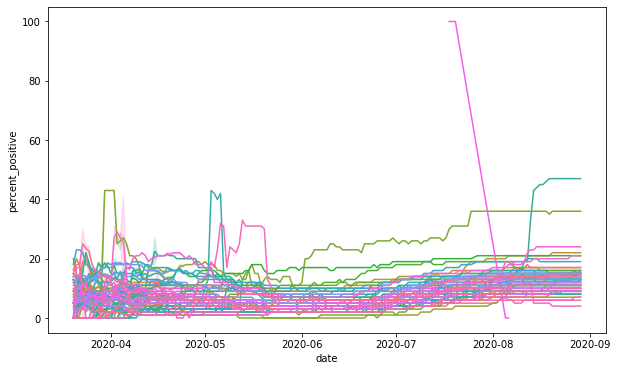

In [26]:
sns.lineplot(x = 'date', y ='percent_positive', hue = 'county', data = df,legend=False)

In [9]:
dir(plt)

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Figure',
 'FigureCanvasBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'Number',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotTool',
 'Text',
 'TickHelper',
 'Widget',
 '_INSTALL_FIG_OBSERVER',
 '_IP_REGISTERED',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_get_running_interactive_framework',
 '_interactive_bk',
 '_log',
 '_pylab_helpers',
 '_setp',
 '_setup_pyplot_info_docstrings',
 '_show',
 'acorr',
 'angle_spectrum',
 'annotate',
 'arrow',
 'autoscale',

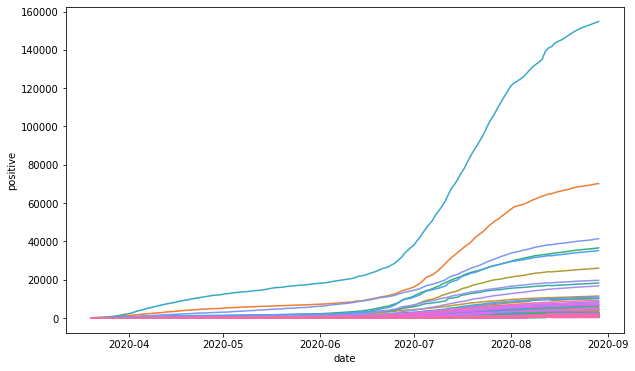

In [8]:
sns.lineplot(x = 'date', y ='positive', hue = 'county', data = df,legend=False)
plt.legend(loc='best')
plt.ylabel('Date')
plt.xlabel('Cumulative Case Count')
plt.title('Florida COVID-19 Cumulative Case Count by County')

In [10]:
df.columns

Index(['awaiting_testing', 'negative', 'positive', 'percent_positive',
       'total_tested', 'file_name', 'county', 'inconclusive', 'day_of_week',
       'new_negatives', 'new_cases', 'date', 's0101_c01_032e',
       's1501_c02_002e', 's1501_c02_009e', 's1901_c01_012e', 'dp05_0001e',
       'dp05_0037pe', 'dp05_0038pe', 'dp05_0039pe', 'dp05_0044pe',
       'dp05_0052pe', 'fips', 'length_of_life_rank', 'quality_of_life_rank',
       'health_behaviors_rank', 'clinical_care_rank',
       'social_economic_factors_rank', 'physical_environment_rank',
       'adult_smoking_percent', 'adult_obesity_percent', 'uninsured_percent',
       'primary_care_physicians_ratio', 'income_inequality_ratio',
       'air_pollution_particulate_matter', 'overcrowding',
       'adult_diabetes_percent', 'median_household_income',
       'percent_over_65_yrs', 'black_percent', 'hispanic_percent',
       'female_percent', 'rural_percent', 'week'],
      dtype='object')

Text(0.5, 1.0, 'Florida COVID-19 Daily Case Count by County')

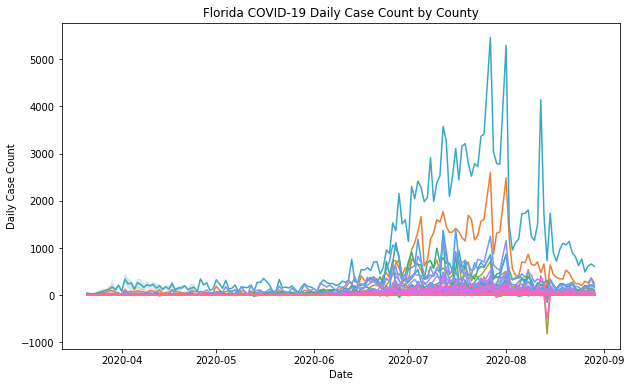

In [13]:
sns.lineplot(x = 'date', y ='new_cases', hue = 'county', data = df,legend=False)
plt.xlabel('Date')
plt.ylabel('Daily Case Count')
plt.title('Florida COVID-19 Daily Case Count by County')

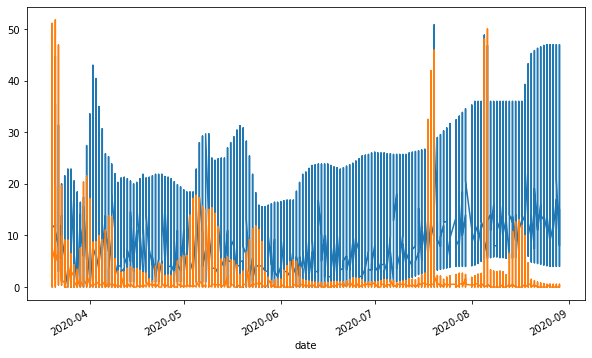

In [36]:
rolmean = df_indexed.percent_positive.rolling(window=7).mean()

rolstd = df_indexed.percent_positive.rolling(window=7).std()
rolmean.plot()
rolstd.plot()

### Missingness Analysis

In [ ]:
df.agg

In [ ]:
df.groupby('county').agg(['sum'])

In [42]:
df.groupby('county').sum(skipna=True)

TypeError: _cython_agg_general() got an unexpected keyword argument 'skipna'

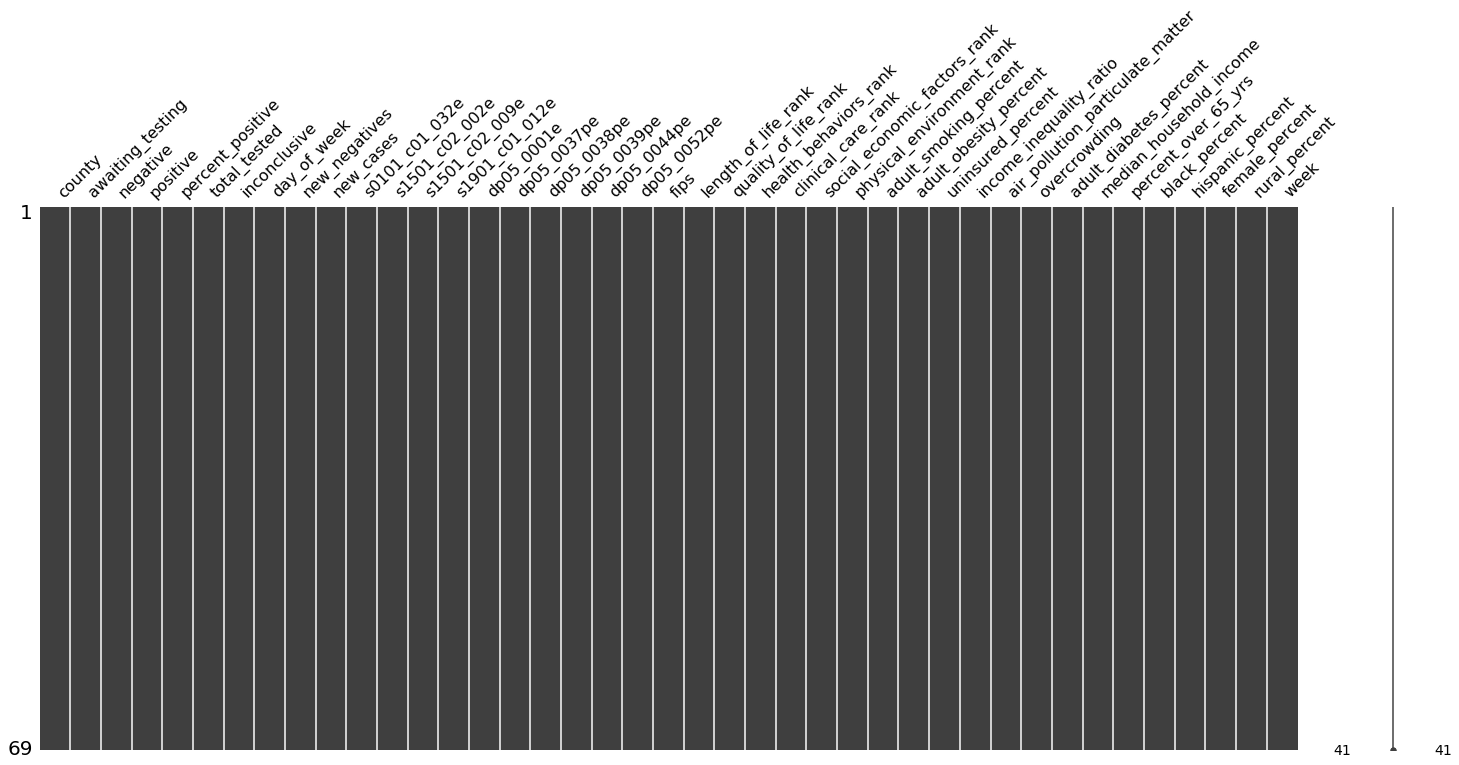

In [40]:
msno.matrix(df.groupby('county').sum().reset_index())

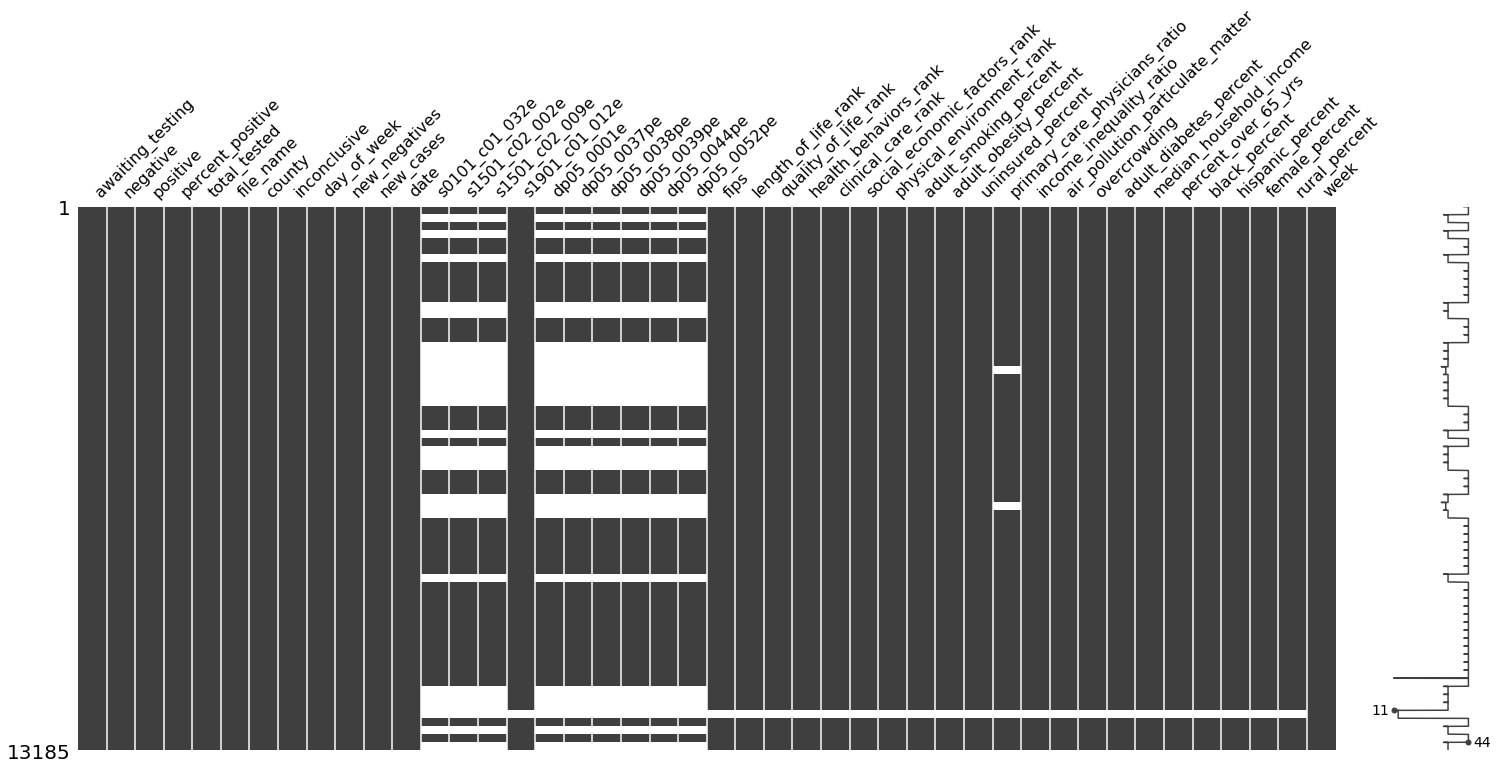

In [43]:
msno.matrix(df)

In [35]:
df.groupby('county')['positive'].sum().sort_values(ascending=False).head(10)

TypeError: _cython_agg_general() got an unexpected keyword argument 'skipna'

In [16]:
df.loc[df.new_cases <0][['new_cases','date','county']].head(50)

,new_cases,date,county
5,-1.0,2020-03-23,ALACHUA
34,-2.0,2020-04-07,ALACHUA
45,-32.0,2020-04-13,ALACHUA
54,-1.0,2020-04-17,ALACHUA
64,-1.0,2020-04-22,ALACHUA
90,-1.0,2020-05-16,ALACHUA
296,-1.0,2020-05-28,BAKER
322,-2.0,2020-06-23,BAKER
434,-1.0,2020-04-13,BAY
492,-1.0,2020-05-30,BAY
